In [30]:
# Importing necessary libraries from scikit-learn for Support Vector Machine (SVM) classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Importing essential libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing datasets module from scikit-learn for access to built-in datasets
from sklearn import datasets

In [31]:
def plot_svm(model, X, y, x_label=None, y_label=None):
    """
    Function plot_svm generates a visualization of SVM classification results. 
    
    Inputs: 
        SVM model model, input features X, target labels y, and optional x and y axis labels. 
    Outputs:
        The function calculates the plot boundaries based on the input data and creates a meshgrid for plotting. 
        It then predicts the model output for each point in the meshgrid and visualizes the decision boundaries and data points using matplotlib.
    """
    
    # Define the boundaries of the plot based on the data
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a meshgrid for the plot
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
    
    # Predict the model output for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Plotting the figure
    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) # Plot decision boundaries
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.coolwarm, s=30, edgecolors='k') # Plot data points
    plt.xlabel(x_label, fontsize= 16) # Set x-axis label
    plt.ylabel(y_label, fontsize= 16) # Set y-axis label   

## Section 1

In [32]:
# Importing the Iris dataset from scikit-learn for demonstration
iris = datasets.load_iris()

# By converting the Iris dataset into a pandas DataFrame and then using describe(), you can obtain a statistical summary of the dataset.
iris_data_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_target_df = pd.DataFrame(data=iris.target, columns=['target'])

# Display the description of the Iris dataset
print(iris_data_df.head())
print(iris_target_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   target
0       0
1       0
2       0
3       0
4       0


In [33]:
# Taking only Versicolor and Virginica class. 
# Note the classical support vector machine classifies between 2 categories 
X = iris.data[50:150, :2] # Selecting the first two features for the selected classes
y = iris.target[50:150] # Assigning the target labels for the selected classes

In [34]:
# Split and standardize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=2) # Splitting the data
scaler = StandardScaler()
scaler.fit(X_train) # Fitting the scaler on the training data
Xs_train = scaler.transform(X_train) # Standardizing the training features
Xs_test = scaler.transform(X_test) # Standardizing the testing features

The hyperparameter 'C' in Support Vector Machines (SVM) plays a crucial role in balancing the training error and the margin width of the decision boundary. Here's a summary of how the hyperparameter 'C' works based on the search results:

- **Significance of 'C':** The parameter 'C' in SVM helps control the trade-off between training error and margin width. It determines the penalty for misclassifications during training, impacting generalization performance and the risk of overfitting or underfitting.
  
- **Effect of 'C' Value:**
  - **Small 'C' Value:** A smaller 'C' value allows for a larger margin, potentially leading to more misclassifications on the training data. This can be beneficial when data points are well-separated but may lead to underfitting if set too small.
  
  - **Large 'C' Value:** Conversely, a larger 'C' value emphasizes minimizing training error, resulting in a narrower margin. This is useful when data points are not well-separated or when noise is present, but setting it too large can increase the risk of overfitting.

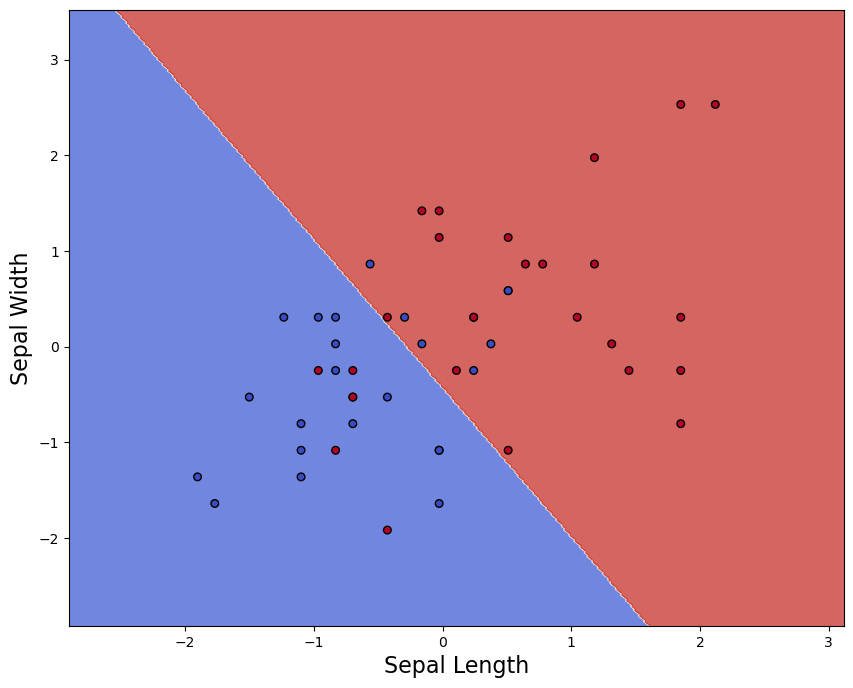

In [35]:
# Setting the hyperparameter C to 0.1 for the Support Vector Machine model with a linear kernel.
model = SVC(C=0.1, kernel='linear').fit(Xs_train, y_train)  # Fitting the SVM model

# Visualizing the SVM classification results on the training data.
plot_svm(model, Xs_train, y_train, 'Sepal Length', 'Sepal Width')  # Plotting the SVM decision boundaries

In [36]:
# Calculating and printing the misclassification error on the training set.
misclassification_error = 1 - model.score(Xs_train, y_train)
print(misclassification_error)

0.24


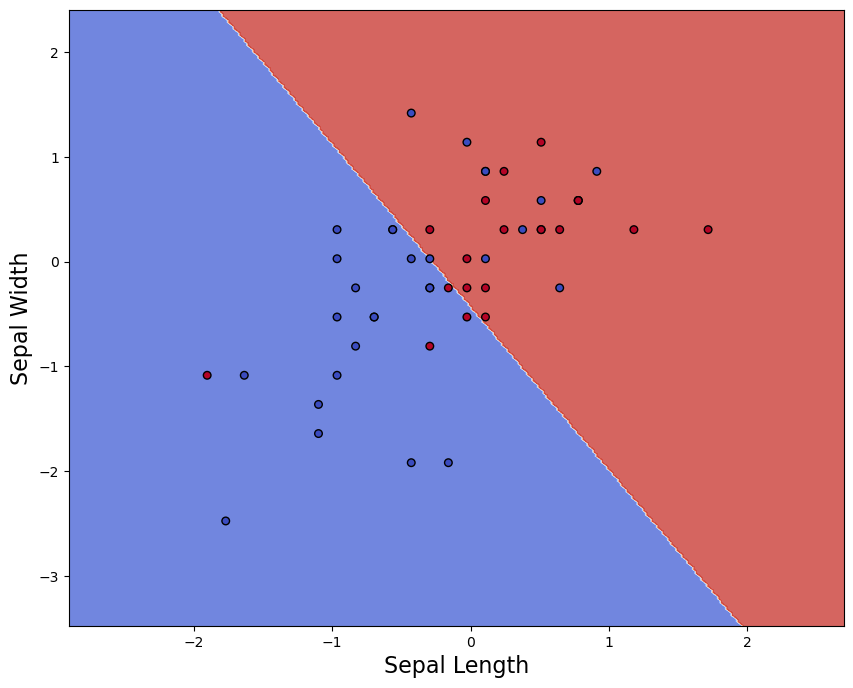

In [37]:
# Predicting the target labels for the test set using the trained SVM model.
y_test_pred = model.predict(Xs_test)

# Visualizing the SVM classification results on the test data.
plot_svm(model, Xs_test, y_test, 'Sepal Length', 'Sepal Width')

In [38]:
# Calculating and printing the misclassification error on the test set.
misclassification_error_test = 1 - metrics.accuracy_score(y_test, y_test_pred)
print(misclassification_error_test)

0.33999999999999997


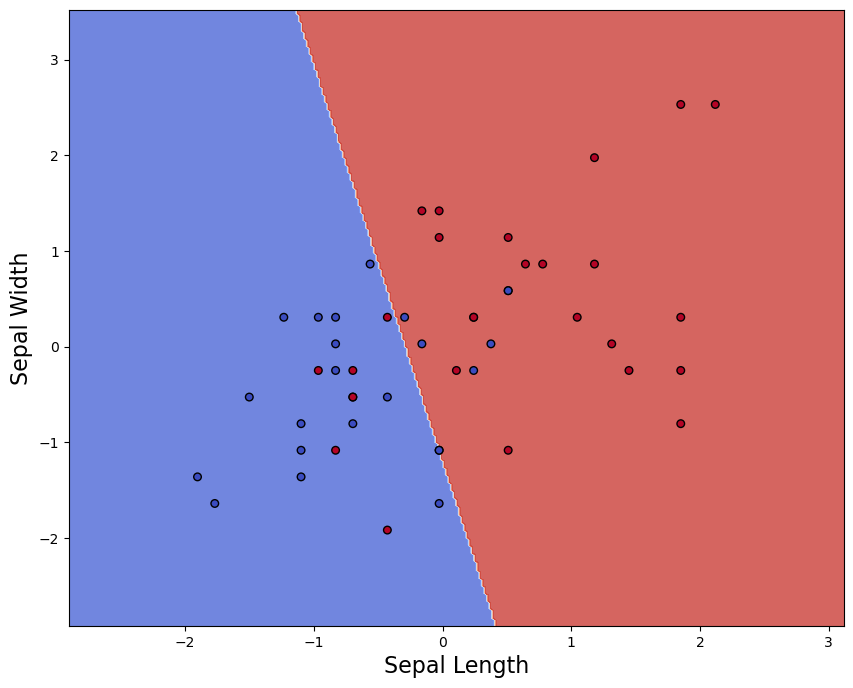

In [39]:
# Setting the hyperparameter C to 10 for the Support Vector Machine model with a linear kernel.
model = SVC(C=10, kernel='linear').fit(Xs_train, y_train)  # Fitting the SVM model

# Visualizing the SVM classification results on the training data with C=10.
plot_svm(model, Xs_train, y_train, 'Sepal Length', 'Sepal Width')  # Plotting the SVM decision boundaries

In [40]:
# Calculating and printing the misclassification error on the training set with C=10.
misclassification_error_C10 = 1 - model.score(Xs_train, y_train)
print(misclassification_error_C10)

0.24


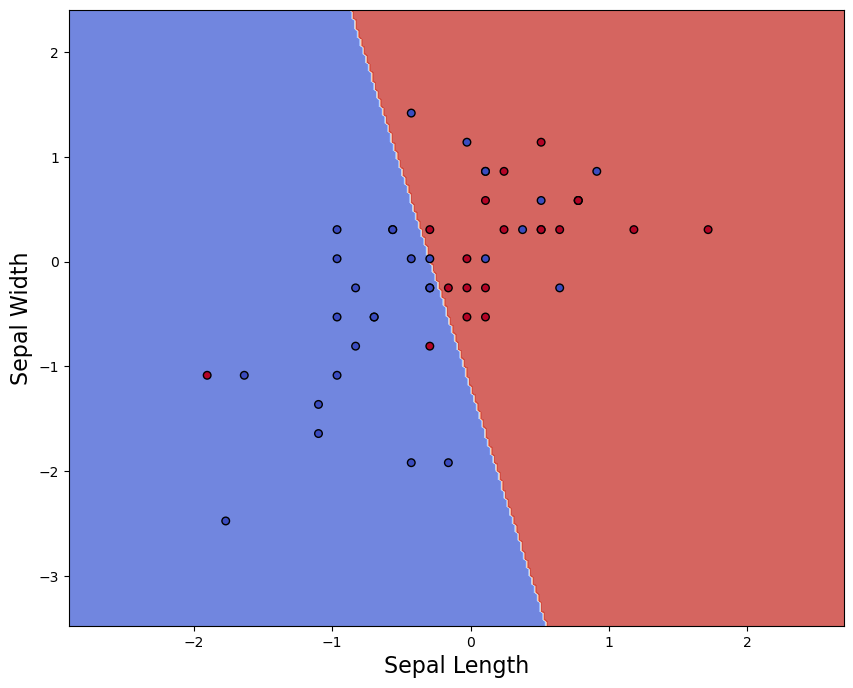

In [41]:
# Predicting the target labels for the test set using the SVM model with C=10.
y_test_pred = model.predict(Xs_test)

# Visualizing the SVM classification results on the test data with C=10.
plot_svm(model, Xs_test, y_test, 'Sepal Length', 'Sepal Width')

In [42]:
# Calculating and printing the misclassification error on the test set with C=10.
misclassification_error_test_C10 = 1 - metrics.accuracy_score(y_test, y_test_pred)
print(misclassification_error_test_C10)

0.28


## Section 2

In [43]:
# import data
vote_df = pd.read_csv("vote.csv")
work_df = pd.read_csv("work.csv")

In [44]:
work_df.head()

,prtage,pesex,ptdtrace,pehspnon,prcitshp,peeduca,work
0,35,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",HIGH SCHOOL GRAD-DIPLOMA OR,flexible
1,41,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",HIGH SCHOOL GRAD-DIPLOMA OR,flexible
2,53,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",BACHELOR'S DEGREE,not flexible
3,21,FEMALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",SOME COLLEGE BUT NO DEGREE,flexible
4,45,FEMALE,Black Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",SOME COLLEGE BUT NO DEGREE,flexible


In [45]:
vote_df.head()

,prtage,pesex,ptdtrace,pehspnon,prcitshp,peeduca,vote
0,19,FEMALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",SOME COLLEGE BUT NO DEGREE,vote
1,35,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED","MASTER'S DEGREE (EX: MA, MS,",vote
2,48,MALE,White Only,HISPANIC,"FOREIGN BORN, U.S. CITIZEN BY",5TH OR 6TH GRADE,vote
3,55,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",BACHELOR'S DEGREE,did not vote
4,25,FEMALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",SOME COLLEGE BUT NO DEGREE,vote


In [46]:
# Map labels to 0 and 1
work_mapper = {'flexible': 1, "not flexible": 0}
vote_mapper = {'vote': 1, "did not vote": 0}

In [47]:
work_df['work'] = work_df['work'].replace(work_mapper)
vote_df['vote'] = vote_df['vote'].replace(vote_mapper)

In [48]:
work_df.head()

,prtage,pesex,ptdtrace,pehspnon,prcitshp,peeduca,work
0,35,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",HIGH SCHOOL GRAD-DIPLOMA OR,1
1,41,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",HIGH SCHOOL GRAD-DIPLOMA OR,1
2,53,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",BACHELOR'S DEGREE,0
3,21,FEMALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",SOME COLLEGE BUT NO DEGREE,1
4,45,FEMALE,Black Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",SOME COLLEGE BUT NO DEGREE,1


In [49]:
vote_df.head()

,prtage,pesex,ptdtrace,pehspnon,prcitshp,peeduca,vote
0,19,FEMALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",SOME COLLEGE BUT NO DEGREE,1
1,35,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED","MASTER'S DEGREE (EX: MA, MS,",1
2,48,MALE,White Only,HISPANIC,"FOREIGN BORN, U.S. CITIZEN BY",5TH OR 6TH GRADE,1
3,55,MALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",BACHELOR'S DEGREE,0
4,25,FEMALE,White Only,NON-HISPANIC,"NATIVE, BORN IN THE UNITED",SOME COLLEGE BUT NO DEGREE,1


When using the Support Vector Classifier (SVC), it is important to note that the function does not inherently handle multicollinearity or automatically drop one dummy variable like Ordinary Least Squares (OLS) regression does. Here is an elaboration on this concept:

- **Multicollinearity:** Multicollinearity occurs when independent variables in a model are highly correlated with each other. In the context of SVC, multicollinearity can affect the model's performance and interpretation of feature importance. Unlike OLS regression, which can handle multicollinearity to some extent, SVC does not have built-in mechanisms to address this issue.

- **Dummy Variables:** When dealing with categorical variables in machine learning models like SVC, it is common practice to convert them into dummy variables for model compatibility. By default, `pd.get_dummies()` in pandas creates dummy variables for all categories in a categorical feature. However, setting `drop_first=True` allows dropping the first category, which helps avoid multicollinearity issues and aligns with how OLS regression automatically handles dummy variables.

- **Drop First Dummy:** Dropping the first dummy variable when creating dummy variables is crucial to prevent multicollinearity and ensure model stability. This practice is particularly important in models like SVC where multicollinearity can impact the decision boundaries and overall performance.

By setting `drop_first=True` in `pd.get_dummies()`, you ensure that only $k-1$ dummy variables are created for a categorical feature with $k$ categories, effectively handling multicollinearity issues and aligning with the approach commonly used in OLS regression. This adjustment helps maintain model integrity and improves the interpretability of the results when using SVC with categorical features.

In [50]:
# Converting the 'citizenship' categories in the 'work_df' DataFrame to dummy variables and checking the output.
work_df = pd.get_dummies(work_df, columns=['prcitshp'], drop_first=True)  # Convert 'prcitshp' categories to dummies with drop_first=True
work_df.columns  # Displaying the columns of the updated DataFrame

Index(['prtage', 'pesex', 'ptdtrace', 'pehspnon', 'peeduca', 'work',
       'prcitshp_FOREIGN BORN, U.S. CITIZEN BY',
       'prcitshp_NATIVE, BORN ABROAD OF',
       'prcitshp_NATIVE, BORN IN PUERTO RICO OR',
       'prcitshp_NATIVE, BORN IN THE UNITED'],
      dtype='object')

In [51]:
# Converting the 'citizenship' categories in the 'vote_df' DataFrame to dummy variables and checking the output.
vote_df = pd.get_dummies(vote_df, columns=['prcitshp'], drop_first=True)  # Convert 'prcitshp' categories to dummies
vote_df.columns  # Displaying the columns of the updated DataFrame

Index(['prtage', 'pesex', 'ptdtrace', 'pehspnon', 'peeduca', 'vote',
       'prcitshp_NATIVE, BORN ABROAD OF',
       'prcitshp_NATIVE, BORN IN PUERTO RICO OR',
       'prcitshp_NATIVE, BORN IN THE UNITED'],
      dtype='object')

In [52]:
# Add column of zeros to vote_df since it has one less category in citizenship
vote_df["prcitshp_FOREIGN BORN, NOT A CITIZEN OF"] = 0
vote_df.columns 

Index(['prtage', 'pesex', 'ptdtrace', 'pehspnon', 'peeduca', 'vote',
       'prcitshp_NATIVE, BORN ABROAD OF',
       'prcitshp_NATIVE, BORN IN PUERTO RICO OR',
       'prcitshp_NATIVE, BORN IN THE UNITED',
       'prcitshp_FOREIGN BORN, NOT A CITIZEN OF'],
      dtype='object')

In [53]:
# Check if both are now same
print(len(work_df.columns))
print(len(vote_df.columns))

10
10


In [54]:
print(work_df.ptdtrace.unique())
print(vote_df.ptdtrace.unique())

['White Only' 'Black Only' 'White-AI' 'Black-AI' 'Asian Only'
 'White-Asian' 'Hawaiian/Pacific Islander Only' 'Asian-HP'
 'White-Hawaiian' 'American Indian, Alaskan' 'White-Black' '2 or 3 Races'
 '4 or 5 Races']
['White Only' 'Black Only' 'Hawaiian/Pacific Islander Only' 'Asian Only'
 'American Indian, Alaskan' 'White-AI' 'Black-AI' 'W-B-AI' '2 or 3 Races'
 'White-Asian' 'Asian-HP' 'White-Black' 'White-Hawaiian' 'W-A-HP'
 'Black-Asian']


In [55]:
work_df = pd.get_dummies(work_df, columns=['ptdtrace'])
vote_df = pd.get_dummies(vote_df, columns=['ptdtrace'])
print(len(work_df.columns))
print(work_df.columns)
print(len(vote_df.columns))
print(vote_df.columns)
vote_df['4 or 5 Races'] = 0
work_df['W-B-AI'] = 0
work_df['W-A-HP'] = 0
work_df['Black-Asian'] = 0

22
Index(['prtage', 'pesex', 'pehspnon', 'peeduca', 'work',
       'prcitshp_FOREIGN BORN, U.S. CITIZEN BY',
       'prcitshp_NATIVE, BORN ABROAD OF',
       'prcitshp_NATIVE, BORN IN PUERTO RICO OR',
       'prcitshp_NATIVE, BORN IN THE UNITED', 'ptdtrace_2 or 3 Races',
       'ptdtrace_4 or 5 Races', 'ptdtrace_American Indian, Alaskan',
       'ptdtrace_Asian Only', 'ptdtrace_Asian-HP', 'ptdtrace_Black Only',
       'ptdtrace_Black-AI', 'ptdtrace_Hawaiian/Pacific Islander Only',
       'ptdtrace_White Only', 'ptdtrace_White-AI', 'ptdtrace_White-Asian',
       'ptdtrace_White-Black', 'ptdtrace_White-Hawaiian'],
      dtype='object')
24
Index(['prtage', 'pesex', 'pehspnon', 'peeduca', 'vote',
       'prcitshp_NATIVE, BORN ABROAD OF',
       'prcitshp_NATIVE, BORN IN PUERTO RICO OR',
       'prcitshp_NATIVE, BORN IN THE UNITED',
       'prcitshp_FOREIGN BORN, NOT A CITIZEN OF', 'ptdtrace_2 or 3 Races',
       'ptdtrace_American Indian, Alaskan', 'ptdtrace_Asian Only',
       'ptdtrace_A

In [56]:
# For remaining columns
work_df = pd.get_dummies(work_df, columns=['pesex'], drop_first=True)
vote_df = pd.get_dummies(vote_df, columns=['pesex'], drop_first=True)
work_df = pd.get_dummies(work_df, columns=['pehspnon'], drop_first=True)
vote_df = pd.get_dummies(vote_df, columns=['pehspnon'], drop_first=True)
work_df = pd.get_dummies(work_df, columns=['peeduca'], drop_first=True)
vote_df = pd.get_dummies(vote_df, columns=['peeduca'], drop_first=True)

In [57]:
print(len(work_df.columns))
print(work_df.columns)

print(len(vote_df.columns))
print(vote_df.columns)

39
Index(['prtage', 'work', 'prcitshp_FOREIGN BORN, U.S. CITIZEN BY',
       'prcitshp_NATIVE, BORN ABROAD OF',
       'prcitshp_NATIVE, BORN IN PUERTO RICO OR',
       'prcitshp_NATIVE, BORN IN THE UNITED', 'ptdtrace_2 or 3 Races',
       'ptdtrace_4 or 5 Races', 'ptdtrace_American Indian, Alaskan',
       'ptdtrace_Asian Only', 'ptdtrace_Asian-HP', 'ptdtrace_Black Only',
       'ptdtrace_Black-AI', 'ptdtrace_Hawaiian/Pacific Islander Only',
       'ptdtrace_White Only', 'ptdtrace_White-AI', 'ptdtrace_White-Asian',
       'ptdtrace_White-Black', 'ptdtrace_White-Hawaiian', 'W-B-AI', 'W-A-HP',
       'Black-Asian', 'pesex_MALE', 'pehspnon_NON-HISPANIC',
       'peeduca_11TH GRADE', 'peeduca_12TH GRADE NO DIPLOMA',
       'peeduca_1ST, 2ND, 3RD OR 4TH GRADE', 'peeduca_5TH OR 6TH GRADE',
       'peeduca_7TH OR 8TH GRADE', 'peeduca_9TH GRADE',
       'peeduca_ASSOCIATE DEGREE-ACADEMIC',
       'peeduca_ASSOCIATE DEGREE-OCCUPATIONAL/', 'peeduca_BACHELOR'S DEGREE',
       'peeduca_DOCTORATE 

In [58]:
# Alternatively: We can also map to ordinal values (optional)
# mapper = {'HIGH SCHOOL GRAD-DIPLOMA OR':9,
# "BACHELOR'S DEGREE":13,
# 'SOME COLLEGE BUT NO DEGREE':10,
# "MASTER'S DEGREE (EX: MA, MS,":14,
# 'ASSOCIATE DEGREE-OCCUPATIONAL/':11,
# 'ASSOCIATE DEGREE-ACADEMIC':12,
# '11TH GRADE':7,
# '10TH GRADE':6,
# 'PROFESSIONAL SCHOOL DEG':15,
# '9TH GRADE':5,
# 'DOCTORATE DEGREE':16,
# '7TH OR 8TH GRADE':4,
# '12TH GRADE NO DIPLOMA':8,
# '5TH OR 6TH GRADE':3,
# '1ST, 2ND, 3RD OR 4TH GRADE':2,
# 'LESS THAN 1ST GRADE':1,
# }

# work_df['peeduca'] = work_df['peeduca'].replace(mapper)

In [59]:
X = work_df.drop('work', axis = 1)
y = work_df['work']

In [60]:
# Define the set of parameters for grid search
parameters = {'kernel': ('linear', 'poly', 'sigmoid'), 'C': [0.1, 1, 10]}

# Import necessary libraries and set up GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC

svc = SVC()  # Initialize the Support Vector Classifier
fkf = KFold(n_splits=5, random_state=10, shuffle=True)  # Define a 5-fold cross-validation strategy

# Run GridSearchCV to find the best combination of parameters
clf = GridSearchCV(svc, parameters, cv=fkf)  # Setting up GridSearchCV with the defined parameters and cross-validation strategy

# Fit the GridSearchCV on the data (X) and target labels (y)
clf.fit(X, y)  # Fitting the GridSearchCV to find the best model based on the specified parameters

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ('linear', 'poly', 'sigmoid')})

In [61]:
# Print out the mean score for each combination of parameters
for params, mean_score, rank in zip(clf.cv_results_["params"], clf.cv_results_["mean_test_score"], clf.cv_results_["rank_test_score"]):
    print(params, mean_score, rank)

# The fourth set (C = 1, Kernel = 'poly') gives us the best result

{'C': 0.1, 'kernel': 'linear'} 0.8628 4
{'C': 0.1, 'kernel': 'poly'} 0.865 3
{'C': 0.1, 'kernel': 'sigmoid'} 0.347 7
{'C': 1, 'kernel': 'linear'} 0.8625999999999999 5
{'C': 1, 'kernel': 'poly'} 0.8662000000000001 2
{'C': 1, 'kernel': 'sigmoid'} 0.2852 8
{'C': 10, 'kernel': 'linear'} 0.8618 6
{'C': 10, 'kernel': 'poly'} 0.867 1
{'C': 10, 'kernel': 'sigmoid'} 0.28440000000000004 9


In [72]:
max(clf.cv_results_['mean_test_score'])

0.867

### Section 2.4

In order to impute the work flexibility measure for the main analysis, you need to
   1) Fit the model with the tuned values of C and the kernal that minimize the 5FCV error rate on the work_df data 
   
   2) Create X and y from vote_df (don't forget to standardize)   
   3) Predict the imputed work flexibility measure for the vote_df data   
   4) Calculate summary statistics for the imputed measure     

This is left as an exercise for the mini-project.  Instead, we'll create a variable that's all random noise (and no signal) to illustrate what happens if our regression if our prediction performs poorly.  Note that this would be the most extreme case of a poor prediction.  

In [74]:
# Generate a random imputed work measure instead of using our prediction.  
# Since the flexible work schedule variable is binary, this should be 0 or 1 at random
np.random.seed(23)
imputed_work = np.random.randint(0,2, size=len(vote_df))
vote_df["imputed_work"] = imputed_work

In [76]:
# Calculate summary statistics for the imputed measure
vote_df["imputed_work"].describe()

count    5000.000000
mean        0.494400
std         0.500019
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: imputed_work, dtype: float64

Now let's run the regression we care about and have worked so hard to set up:  voting status on the imputed work schedule!  

In [77]:
import statsmodels.formula.api as smf
result = smf.ols('vote ~  imputed_work + prtage + np.power(prtage, 2) + pesex_MALE', data = vote_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   vote   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1444.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:56:58   Log-Likelihood:                -1700.8
No. Observations:                5000   AIC:                             3412.
Df Residuals:                    4995   BIC:                             3444.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.7087    

Note that the coefficient on imputed_work is close to zero and is not statistically significant.  This is unsurprising because the imputed work variable was generated at random.  It contains no information!  

As previously mentioned, this is an extreme case of a poor prediction.  But all predictions contain some true information (signal) and some randomness (noise).  Whenever an explanatory variable is mismeasured, it will lead to measurement error.  If that measurement error is random (uncorrelated with the true dependent and independent variables, as well as the error term in the regression), it will lead to what's known as "attenuation bias" in the estimates.  In that case, the coefficient estimates will be attenuated (shrink) towards zero.  

This is exactly what we see in our extreme case!  Less extreme cases (e.g., imperfect predictions) can still attenuate estimates towards zero, just not all the way.  

So we'll want to correct for this issue.  Luckily, Lewbel (2007) provides a formula we can use in our context to correct for this attenuation bias.

In [78]:
# Before we do, let's store our estimate of the coefficient on the imputed work measure
# We'll need it for our correction
work_vote_relationship = result.params[1]

### Section 2.5: Bias Correction

The M scaling function comes from a Lewbel (2007) Econometrica paper (https://doi.org/10.1111/j.1468-0262.2006.00756.x), the paper is dense, but the intuition is that you can't just treat a predicted variable as if it's data.  There's measurement error that comes from the imprecision in the prediction.  The paper derives the effect of that measurement error in the case of "the conditional average effect of a binary treatment or policy on some outcome where treatment may be misclassified."

In essence, since the work variable is a mix of signal and noise, it's effect on voting is attenuated (closer to zero) than if it had been all signal and no noise.  Our regression illustrates this attenuation effect.

The M function is a correction for the amount of noise that biases the estimate.

In [79]:
# First, let's define the attenuation bias correction formula
def compute_M(a,b):
    return 1 / (1 - 2 * b) * (1 - (1 - b) * b / a - (1 - b) * b / (1 - a))

In [80]:
# Next, let's calculate the inputs to the bias correction
# For the value of a, find the proportion of imputed work schedules that are flexible
a = sum(imputed_work)/(imputed_work.size)
print(a)

0.4944


In [81]:
# For the value of b, use the cross-validation error rate 
b = 1 - max(clf.cv_results_['mean_test_score'])
print(b)

0.133


In [82]:
M = compute_M(a,b)
print(M)

0.7339211638882369


In [83]:
work_vote_bias_correction = work_vote_relationship / M
print(work_vote_bias_correction)

0.0031836491891181857


It isn't immediately obvious because our estimated coefficient (0.0023) is so close to zero (because of the attenuation bias), but the correction moves our estimate away from zero (makes it larger).  